In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Some random PHQ score set

In [2]:
df = pd.read_csv('PHQ9 Scores.csv')

In [5]:
df.head()

,Patient ID,First PHQ Score,First PHQ Score Date,Last PHQ Score,Last PHQ Score Date,Unnamed: 5,Follow-up Time
0,600001,10,11/17/15,4,1/26/16,NaN,69
1,600002,13,11/16/15,11,5/3/16,NaN,167
2,600003,15,11/17/15,3,3/31/16,NaN,134
3,600005,7,11/30/15,9,5/18/16,NaN,168
4,600006,19,11/18/15,11,4/5/16,NaN,137


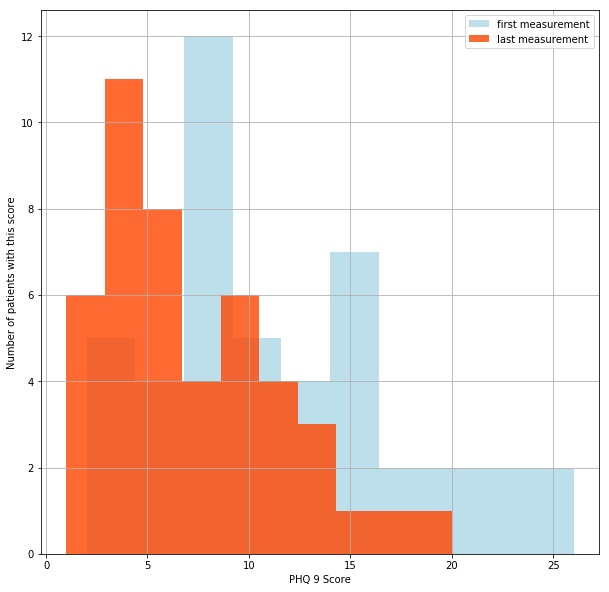

In [10]:
f, a = plt.subplots()
f.set_size_inches(10, 10)

num_bins = 10
df['First PHQ Score'].hist(bins=num_bins, label='first measurement', ax=a, color='lightblue', alpha=0.8)
df['Last PHQ Score'].hist(bins=num_bins, label='last measurement', ax=a, color='orangered', alpha=0.8)
a.set_xlabel('PHQ 9 Score')
a.set_ylabel('Number of patients with this score')
a.legend()

# Cars in a circle

In [1]:
import random

# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# I know how to plot very easily with pandas so I use that
import pandas as pd
# mostly a matter of convenience for mean and std
import numpy as np

## Initial scratch

In [2]:
M = 5
N = 10
T = 20
if M > N:
    raise ValueError('must have fewer objects than spots')

In [3]:
# initialize the cars to first M positions
positions = {m: m for m in range(M)}
# keep track of an occupation dict that tells you if position X on the circle is occupied (1) or not (0)
occupation_dict = {n: 1 if n in positions.values() else 0 for n in range(N)}

In [4]:
def forward_position_free(object_num):
    '''
    Given an object number (i.e. a car identifier), see if the position ahead of it is free
    '''
    object_pos = positions[object_num]
    # incremen the position by one and check if it is free, but don't forget to do modulo the circle size
    occupation_of_next_pos = occupation_dict[(object_pos + 1) % N]
    if occupation_of_next_pos == 1:
        return False
    else:
        return True

In [5]:
[forward_position_free(x) for x in range(M)]

[False, False, False, False, True]

## Codify into class

In [6]:
class CircularRoad():
    # TODO(dstone): put in error catching for illegal moves, even though they shouldn't happen
    def __init__(self, M=5, N=10, T=20, verbose=False):
        self.M = M
        self.N = N
        self.T = T
        self.verbose = verbose

        # initialize the cars to first M positions
        self.positions = {m: m for m in range(self.M)}
        # keep track of an occupation dict that tells you if position X on the circle is occupied (1) or not (0)
        self.occupations = {n: 1 if n in self.positions.values() else 0 for n in range(self.N)}
        
    def forward_position_free(self, object_num):
        '''
        Given an object number (i.e. a car identifier), see if the position ahead of it is free
        '''
        object_pos = self.positions[object_num]
        # incremen the position by one and check if it is free, but don't forget to do modulo the circle size
        occupation_of_next_pos = self.occupations[(object_pos + 1) % self.N]
        if occupation_of_next_pos == 1:
            return False
        else:
            return True
        
    def get_movable_objects(self):
        '''
        Return all object identifiers that have cells ahead of them that are free
        '''
        return [x for x in range(self.M) if self.forward_position_free(x)]
        
    def move_object(self, object_num):
        '''
        Edits positions_dict and occupation dict in place!
        '''
        old_pos = self.positions[object_num]
        # be careful to check modulo circle size
        new_pos = (old_pos + 1) % self.N
        # move to new position
        self.positions[object_num] = new_pos
        # the old space is now empty, the new space is now occupied
        self.occupations[old_pos], self.occupations[new_pos] = 0, 1
        if self.verbose:
            print('[debug] Current positions are:\n\t{pos}'.format(pos=self.positions))
        
    def advance_one_round(self):
        '''
        Find objects eligble for moving, choose one of them at random, and move it. 
        Update the positions and occupations configurations after doing so
        '''
        # choose a position at random
        if self.verbose:
            print('[debug] Advancing round, current positions are:\n\t{pos}'.format(pos=self.positions))
            print('[debug] Current occupations are:\n\t{occ}'.format(occ=self.occupations))
        movable_objs = self.get_movable_objects()
        if self.verbose:
            print('[debug] Current objects that can move are: {objs}'.format(objs=movable_objs))
        obj_to_move = random.choice(movable_objs)
        if self.verbose:
            print('[debug] Objects randomly chosent to move: {obj}'.format(obj=obj_to_move))
        self.move_object(obj_to_move)
        if self.verbose:
            print('[debug] Round advanced, new positions are:\n\t{pos}'.format(pos=self.positions))
            print('[debug] New occupations are:\n\t{occ}'.format(occ=self.occupations))
    
    def get_position_average(self):
        '''
        Return the average of object positions
        '''
        return np.mean([x for x in self.positions.values()])
    
    def get_position_std(self):
        '''
        Return the std. dev. of object positions
        '''
        return np.std([x for x in self.positions.values()])
    
    def run(self):
        for i in range(self.T):
            self.advance_one_round()
            print('Round {i}, average positions: {avg:.3f} +/- {std:.3f}'.format(i=i, avg=self.get_position_average(), std=self.get_position_std()))

In [7]:
cr = CircularRoad(verbose=True, T=20)

In [8]:
cr.get_movable_objects()

[4]

In [9]:
cr.advance_one_round()

[debug] Advancing round, current positions are:
	{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
[debug] Current occupations are:
	{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
[debug] Current objects that can move are: [4]
[debug] Objects randomly chosent to move: 4
[debug] Current positions are:
	{0: 0, 1: 1, 2: 2, 3: 3, 4: 5}
[debug] Round advanced, new positions are:
	{0: 0, 1: 1, 2: 2, 3: 3, 4: 5}
[debug] New occupations are:
	{0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


In [10]:
cr.get_movable_objects()

[3, 4]

In [11]:
# look here for an example run
cr = CircularRoad(verbose=False, T=20)
cr.run()

Round 0, average positions: 2.200 +/- 1.720
Round 1, average positions: 2.400 +/- 1.855
Round 2, average positions: 2.600 +/- 2.154
Round 3, average positions: 2.800 +/- 2.482
Round 4, average positions: 3.000 +/- 2.828
Round 5, average positions: 3.200 +/- 3.187
Round 6, average positions: 3.400 +/- 3.262
Round 7, average positions: 3.600 +/- 3.382
Round 8, average positions: 3.800 +/- 3.311
Round 9, average positions: 4.000 +/- 3.464
Round 10, average positions: 4.200 +/- 3.655
Round 11, average positions: 4.400 +/- 3.499
Round 12, average positions: 4.600 +/- 3.262
Round 13, average positions: 4.800 +/- 3.187
Round 14, average positions: 5.000 +/- 3.033
Round 15, average positions: 5.200 +/- 2.786
Round 16, average positions: 5.400 +/- 2.728
Round 17, average positions: 3.600 +/- 2.728
Round 18, average positions: 3.800 +/- 2.713
Round 19, average positions: 4.000 +/- 2.449


## Collect data and plot

In [14]:
df_positions = pd.DataFrame(columns=['round', 'position_avg', 'position_std'])
T = 10000
N = 10
M = 5
cr = CircularRoad(N=N, M=M) # don't need to specify T, we can do it manually
step_size = 1 # if you don't want to take every single point's average, set this to an int > 1
for i in range(T):
    cr.advance_one_round()
    if i % step_size == 0:
        df_positions.loc[i] = [i, cr.get_position_average(), cr.get_position_std()]

In [12]:
# these are what we expect from a uniform distribution
# https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)
_EXPECTED_AVERAGE = (N-0)/2
_EXPECTED_STD = np.sqrt((N-0)**2/12) # sqrt of the variance, which is (b-a)^2/12 (see wiki)

In [15]:
df_positions.head()

,round,position_avg,position_std
0,0.0,2.2,1.720465
1,1.0,2.4,1.854724
2,2.0,2.6,2.154066
3,3.0,2.8,2.481935
4,4.0,3.0,2.449490


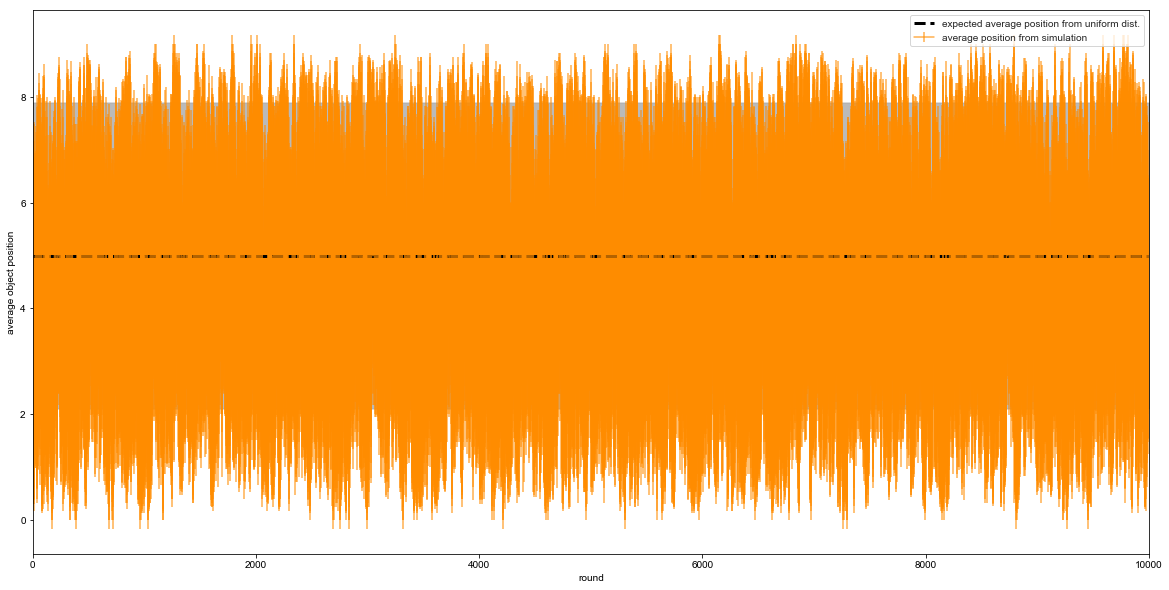

In [16]:
f, a = plt.subplots(figsize=(20,10))
sns.set_style('white')

plt.errorbar(x=df_positions['round'].values,
             y=df_positions['position_avg'].values,
             yerr=df_positions['position_std'].values,
             color='darkorange',
             capthick=2,
             label='average position from simulation',
             alpha=0.7
            )

# plot the expected lines
a.set_xlim([0, T])
plt.plot([0, T], [_EXPECTED_AVERAGE, _EXPECTED_AVERAGE], ls='--', lw=3, color='black', label='expected average position from uniform dist.')

lower_expected_std, upper_expected_std = _EXPECTED_AVERAGE - _EXPECTED_STD, _EXPECTED_AVERAGE + _EXPECTED_STD
a.fill_between(df_positions['round'].values, lower_expected_std, upper_expected_std, color='darkgray', alpha=0.8)

a.set_xlabel('round')
a.set_ylabel('average object position')
a.legend()

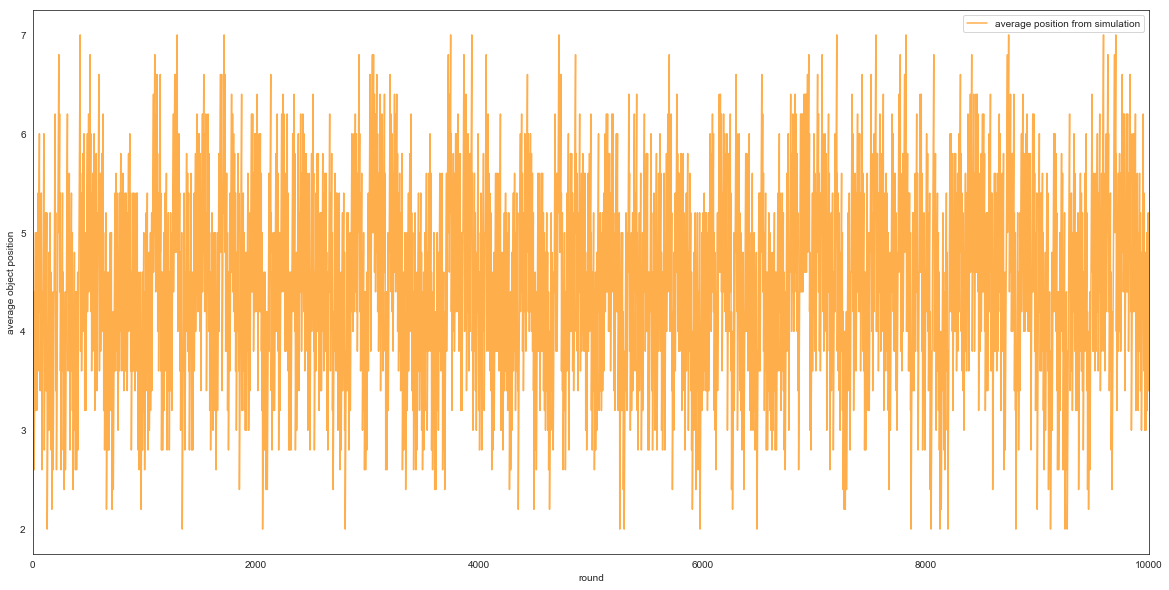

In [28]:
# averages only, no error bars-- to get a clearer look at that behavior
f, a = plt.subplots(figsize=(20,10))
sns.set_style('white')

plt.plot(df_positions['round'].values,
         df_positions['position_avg'].values,
         color='darkorange',
         label='average position from simulation',
         alpha=0.7)

a.set_xlim([0, T])
a.set_xlabel('round')
a.set_ylabel('average object position')
a.legend()

## Do some frequency analysis on the way the average position changes

In [21]:
# look to see if there are any frequencies in play with above average
y = df_positions['position_avg'].values
num_points = len(y)
# total 'time interval' in 'time' domain
interval = (T-0)
# get frequencies from positions-- for a given time interval T, the max frequency is 2*pi/T
xf = np.fft.fftfreq(num_points) # frequencies
yf = np.fft.fft(y)
# convert to power
yf = np.abs(yf)**2
# scale so that maximum power is 1.
yf = yf/max(yf)

### Standard Fourier power spectrum

Text(0, 0.5, 'power in frequency')

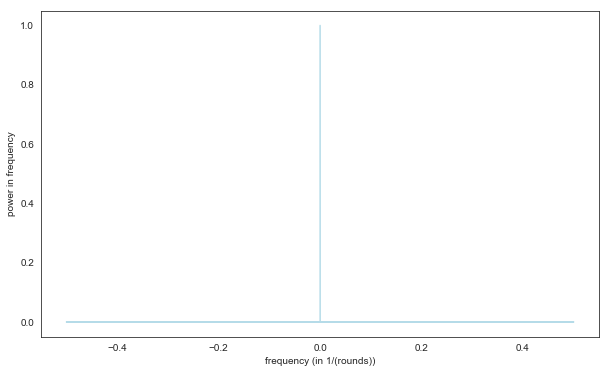

In [22]:
f, a = plt.subplots(figsize=(10,6))
sns.set_style('white')

plt.plot(xf,
         yf,
         color='lightblue',
         label='frequency domain of averages',
         alpha=0.9)

a.set_xlabel('frequency (in 1/(rounds))')
a.set_ylabel('power in frequency')

This is overwhelmed by the 0 Hz frequency, which is annoying and obscure underlying data. See next cell:

In [23]:
# next nearest amplitude
max([x for x in yf if x != 1.])

0.00025989274631681294

So **four** (!) orders of magnitude smaller in power for the next largest frequency after that at 0 Hz

...may just want to exclude the 0 Hz frequency (common, and see below)

### Exclude largest frequency (at 0 Hz) by power to look at rest of plot

In [24]:
# try removing the maximum to see stuff better
max_yf = max(yf)
index_max_yf = np.where(yf == max_yf)
yf_max_removed = [x for x in yf if x != max_yf]

In [25]:
xf_max_removed = [xf[i] for i in range(len(xf)) if i != index_max_yf[0][0]]

Text(0.5, 1.0, 'Power spectrum of position averages with maximum removed')

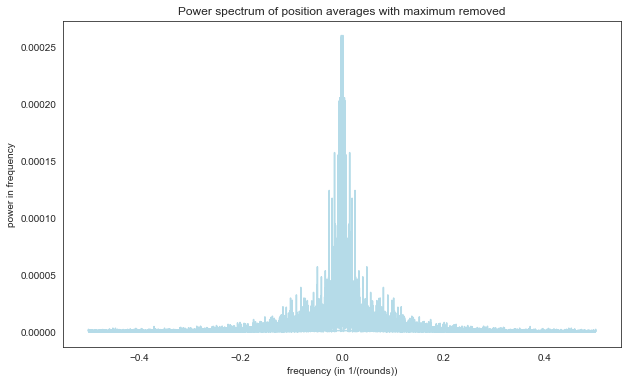

In [26]:
f, a = plt.subplots(figsize=(10,6))
sns.set_style('white')

plt.plot(xf_max_removed,
         yf_max_removed,
         color='lightblue',
         label='frequency domain of averages',
         alpha=0.9)

a.set_xlabel('frequency (in 1/(rounds))')
a.set_ylabel('power in frequency')
a.set_title('Power spectrum of position averages with maximum removed')

This just looks like noise-- no evidence of periodicity in the average position over rounds